Imports

In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

import pcshrink

Read the data

In [2]:
%%time
data = pcshrink.UnpackedAncestryMap("/project/jnovembre/jhmarcus/ancient-sardinia/data/ref_genotypes/7-11-2018/lazaridis_2014/data_fil")

CPU times: user 7.81 s, sys: 2.52 s, total: 10.3 s
Wall time: 7.52 s


In [3]:
print(data.n, data.p)

777 594924


In [4]:
f = np.nansum(data.Y, axis=1) / (2. * data.n)
snp_idx = np.where((f > .05) & (f < .95))[0]
print(f.shape, snp_idx.shape)

(594924,) (391417,)


In [5]:
Z = data.Y[snp_idx, :]

mu = np.nanmean(Z, axis=1).reshape(len(snp_idx), 1)
std = np.nanstd(Z, axis=1).reshape(len(snp_idx), 1)
het = np.sqrt(2. * f[snp_idx] * (1. - f[snp_idx])).reshape(len(snp_idx), 1)

Z = (Z - mu) / het
Z[np.isnan(Z)] = 0.0

In [6]:
%%time
pca = PCA(20)
pca.fit(Z.T)

CPU times: user 1min 56s, sys: 6min 4s, total: 8min
Wall time: 18.6 s


In [7]:
F_hat = pca.components_.T
F_hat.shape

(391417, 20)

In [8]:
L = (F_hat.T @ Z).T 
L = L / np.linalg.norm(L, axis=0, ord=2)

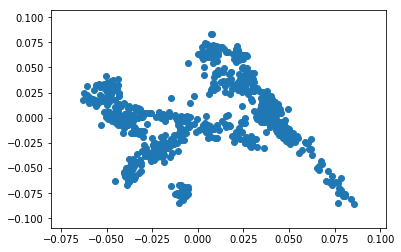

In [9]:
plt.scatter(L[:, 0], -L[:, 1])